
===================================================================
Determining and plotting the altitude/azimuth of Centarus A (Cen A), with respect to ARA
===================================================================

This notebook is based on an Astropy example: https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

We first make a `~astropy.coordinates.SkyCoord` instance for Cen A.
The altitude-azimuth coordinates are then found using
`astropy.coordinates.EarthLocation` and `astropy.time.Time` objects.


*By: Jorge Torres (torresespinosa.1@osu.edu)*





Let's first import useful python modules


In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/")
import reco_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara

from astropy.visualization import astropy_mpl_style, quantity_support #astropy utilities
# plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b031373be80>

In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

Import the packages necessary for finding coordinates and making
coordinate transformations



In [3]:
import astropy.units as u #astropy's units module
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import datetime

`astropy.coordinates.SkyCoord.from_name` uses the SIMBAD Astronomical Database to resolve object
names and retrieve coordinates.

Get the coordinates of Cen A:

In [6]:
CenA = SkyCoord.from_name('Cen A')

Use `astropy.coordinates.EarthLocation` to provide the South Pole's location at a given time. For this example we use the whole year of 2015.



In [4]:
south_pole = EarthLocation(lat=-90.0*u.deg, lon=-74.22*u.deg, height=-30*u.m)
utcoffset = -0*u.hour  # No UTC offset, as the South Pole uses UTC
time = Time('2013-1-01 00:00:00') - utcoffset

Use `astropy.coordinates` to find the Alt, Az coordinates of Cen A at as
observed from the South Pole on the first day of 2015.

In [8]:
CenAaltaz = CenA.transform_to(AltAz(obstime=time,location=south_pole))
print("Cen A's Altitude = {0.alt:.2}".format(CenAaltaz))

Cen A's Altitude = 4.3e+01 deg


Find the alt,az coordinates of Cen A at 365*5 times evenly spaced between Jan 1st and Dec 31, 2015



In [9]:
endtime = Time('2016-12-31 23:00:00') - utcoffset
delta_endtime = np.linspace(0, 365*4, 365*40)*u.day
frame_endtime = AltAz(obstime=endtime+delta_endtime,
                          location=south_pole)
CenAaltazs_endtime = CenA.transform_to(frame_endtime)

Use  `~astropy.coordinates.get_sun` to find the location of the Sun at 365*5
evenly spaced times between Jan 1st and Dec 31, 2015:



In [10]:
from astropy.coordinates import get_sun
delta_endtime = np.linspace(0, 365*4, 365*40)*u.day
timestimeRange = endtime + delta_endtime
frametimeRange = AltAz(obstime=timestimeRange, location=south_pole)
sunaltazstimeRange = get_sun(timestimeRange).transform_to(frametimeRange)

Do the same with `~astropy.coordinates.get_moon` to find when the moon is
up. Be aware that this will need to download a 10MB file from the internet
to get a precise location of the moon.



In [11]:
from astropy.coordinates import get_moon
moontimeRange = get_moon(timestimeRange)
moonaltazstimeRange = moontimeRange.transform_to(frametimeRange)

Find the alt,az coordinates of Cen A at those same times:



In [112]:
CenAaltazstimeRange = CenA.transform_to(frametimeRange)

Make a figure illustrating the altitudes of Cen A, the Sun and the Moon, as well as when the night starts at the South Pole, over that time:



Text(0.5,1,'Sun, Moon and Cen A as seen from the South Pole')

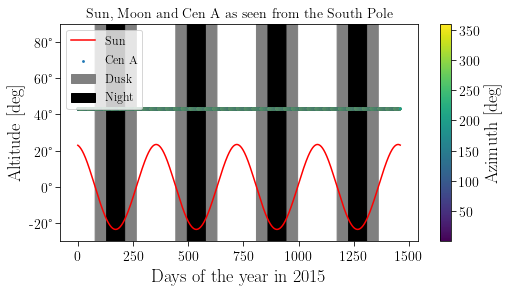

In [113]:
plt.figure(figsize=(8,4))
plt.plot(delta_endtime, sunaltazstimeRange.alt, color='r', label='Sun')
# plt.plot(delta_endtime, moonaltazstimeRange.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_endtime, CenAaltazstimeRange.alt,
            c=CenAaltazstimeRange.az, label='Cen A', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_endtime, -30*u.deg, 90*u.deg,
                 sunaltazstimeRange.alt < -0*u.deg, color='0.5', zorder=0, label="Dusk")
plt.fill_between(delta_endtime, -30*u.deg, 90*u.deg,
                 sunaltazstimeRange.alt < -18*u.deg, color='k', zorder=0, label="Night")
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
# plt.xlim(0*u.day, 365*u.day)
# plt.xticks((np.arange(13)*2-12)*u.hour)
plt.ylim(-30*u.deg, 90*u.deg)
plt.xlabel('Days of the year in 2015')
plt.ylabel('Altitude [deg]')
plt.title("Sun, Moon and Cen A as seen from the South Pole", fontsize=14)
# plt.savefig("CenA_plus_MS.png",dpi=200)

Make a zoomed version of the altitude as a function of time for Cen A

Text(0,0.5,'Altitude [deg]')

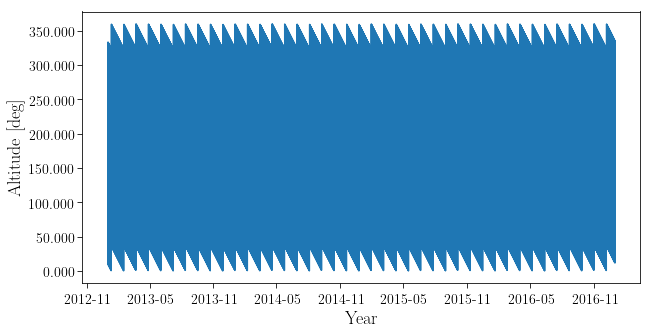

In [114]:
dates = np.arange(datetime.datetime(2013, 1,1), datetime.datetime(2016, 12,31), datetime.timedelta(days=1/10)) #create manual entry for dates
plt.figure(figsize=(10, 5))
# plt.scatter(dates, CenAaltazstimeRange.alt,
#             c=CenAaltazstimeRange.az, label='Cen A', lw=0, s=8,
#             cmap='viridis')
plt.plot(dates,CenAaltazstimeRange.az)
# plt.colorbar().set_label('Azimuth [deg]')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) 
# plt.yticks(np.arange(43.09, 43.12, step=0.01)*u.deg)
plt.xlabel('Year')
plt.ylabel('Altitude [deg]')
# plt.title("Cen A as seen from the South Pole")
# plt.savefig("CenA_alt_2020.png",dpi=200)

Notice that it barely moves wrt to ARA!

Now make a plot of the azimuth angle (phi angle for theta) as a function of time. We expect this to oscillate, with a period of 1 day as the Earth rotates

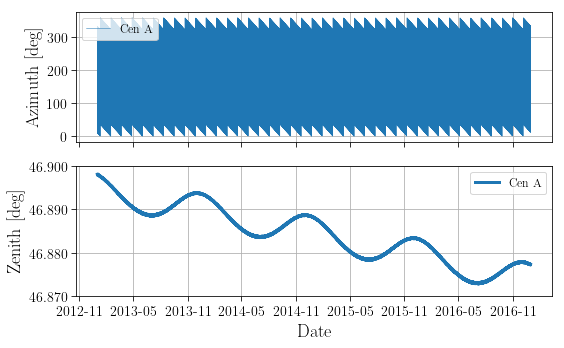

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
axes[0].plot(dates,CenAaltazstimeRange.az,lw = 0.5,  label = "Cen A")

# plt.plot(delta_endtime[::4],CenAaltazstimeRange.az[::4]) #I'm plotting every 4 points, as the plot gets really busy
# axes[0].set_xlabel('Days of the year in 2015')
axes[0].set_ylabel('Azimuth [deg]')
# plt.title("Cen A as seen from the South Pole", fontsize=14)
axes[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
# plt.xlim(0,30)
axes[0].legend()
axes[0].grid()

axes[1].plot(dates,CenAaltazstimeRange.zen, lw = 3, label = "Cen A")
axes[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))
axes[1].set_ylabel('Zenith [deg]')
axes[1].set_xlabel('Date')
axes[1].set_yticks(np.arange(46.87, 46.9, step=0.01)*u.deg)

axes[1].legend()
axes[1].grid()


plt.tight_layout()
# plt.savefig("CenA_az.png",dpi=200)

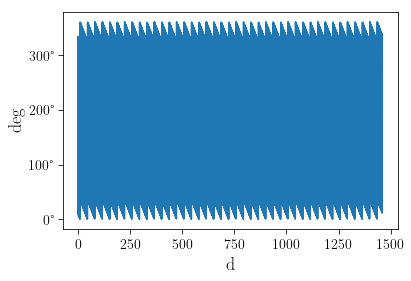

In [70]:
# plt.figure(figsize=(100, 5))

plt.plot(delta_endtime,CenAaltazstimeRange.az)

# Where is the Sun?

In [6]:
from astropy.coordinates import get_sun

sun = pd.read_csv("./data/Sun.txt")
sun2 = pd.read_csv("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/posSun.csv")

In [7]:
sun.tail()

,year,month,day,hour,min,second,minsincemidnight,phi,theta,predictphi,predicttheta
2318,2011,2,15,2,58,6,178,-49.226944,21,-49.033963,77.198489
2319,2011,2,15,2,58,17,178,-48.226944,22,-49.033963,77.198545
2320,2011,2,15,2,58,21,178,-47.226944,26,-49.033963,77.198565
2321,2011,2,15,2,58,48,178,-47.226944,22,-49.033963,77.198703
2322,2011,2,15,2,58,59,178,-48.226944,23,-49.033963,77.198759


In [8]:
sun["minute"] = sun["min"]

In [9]:
sun["date"] = pd.to_datetime(sun[['year', 'month', 'day', 'hour', 'minute']])

In [10]:
from astropy.coordinates import get_sun

time = Time('2011-2-15 01:00:00') - utcoffset
endtime = Time('2011-3-15 0:02:00') - utcoffset
delta_endtime = np.linspace(0, 60, 60*2)*u.minute
frame_endtime = AltAz(obstime=time+delta_endtime,
                          location=south_pole)

timestimeRange = time + delta_endtime
frametimeRange = AltAz(obstime=timestimeRange, location=south_pole)
sunaltazstimeRange = get_sun(timestimeRange).transform_to(frametimeRange)
dates = np.arange(datetime.datetime(2011,2,15,2,0), datetime.datetime(2011,2,15,3,0), datetime.timedelta(minutes=1/2),) #create manual entry for dates


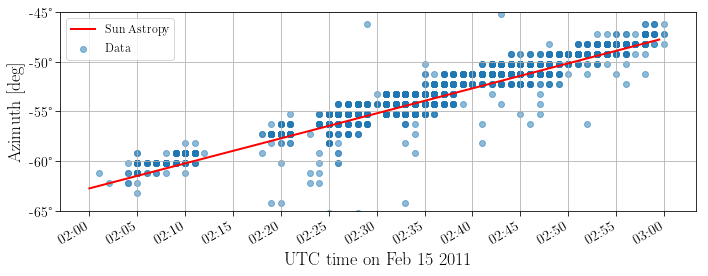

In [12]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
plt.plot(dates, 180*u.deg-sunaltazstimeRange.az-0.*u.deg, color='r', lw = 2, label='Sun Astropy')
# plt.plot(sun["date"], sun["predictphi"], label = "Sun Brian",lw = 2)
# plt.plot(dates, sun2.azimuth,"--", label = "Sun AraRoot", color = "violet",lw = 2)
plt.scatter(sun["date"], sun["phi"], label = "Solar fla", alpha = 0.5, color = "C0")
plt.gcf().autofmt_xdate()
# plt.plot(delta_endtime, moonaltazstimeRange.alt, color=[0.75]*3, ls='--', label='Moon')
# plt.scatter(delta_endtime, CenAaltazstimeRange.alt,
#             c=CenAaltazstimeRange.az, label='Cen A', lw=0, s=8,
#             cmap='viridis')
# plt.fill_between(delta_endtime, -30*u.deg, 90*u.deg,
#                  sunaltazstimeRange.alt < -0*u.deg, color='0.5', zorder=0, label="Dusk")
# plt.fill_between(delta_endtime, -30*u.deg, 90*u.deg,
#                  sunaltazstimeRange.alt < -18*u.deg, color='k', zorder=0, label="Night")
# plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
# plt.xlim(0*u.day, 365*u.day)
# plt.xticks((np.arange(13)*2-12)*u.hour)
# plt.ylim(-30*u.deg, 90*u.deg)
# plt.xlabel('Days of the year in 2015')
plt.ylabel('Azimuth [deg]')
# plt.title("Sun, Moon and Cen A as seen from the South Pole", fontsize=14)
# plt.savefig("CenA_plus_MS.png",dpi=200)
plt.grid()
# plt.yticks(np.arange(-60, -38, step=2)*u.deg)
# plt.xlim(-30,60)
plt.ylim(-65,-45)
plt.xlabel("UTC time on Feb 15 2011")
plt.tight_layout()
# plt.savefig("sunPos_comparison.pdf", dpi = 200)

In [18]:
len(sunaltazstimeRange)

180

In [19]:
sun = pd.read_csv("./data/Sun.txt")
sun2 = pd.read_csv("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/posSun.csv")

In [73]:
sun.tail()

,year,month,day,hour,min,second,minsincemidnight,phi,theta,predictphi,predicttheta,minute,date
2318,2011,2,15,2,58,6,178,-49.226944,21,-49.033963,77.198489,58,2011-02-15 02:58:00
2319,2011,2,15,2,58,17,178,-48.226944,22,-49.033963,77.198545,58,2011-02-15 02:58:00
2320,2011,2,15,2,58,21,178,-47.226944,26,-49.033963,77.198565,58,2011-02-15 02:58:00
2321,2011,2,15,2,58,48,178,-47.226944,22,-49.033963,77.198703,58,2011-02-15 02:58:00
2322,2011,2,15,2,58,59,178,-48.226944,23,-49.033963,77.198759,58,2011-02-15 02:58:00


In [48]:
sun["minute"] = sun["min"]

In [49]:
sun["date"] = pd.to_datetime(sun[['year', 'month', 'day', 'hour', 'minute']])

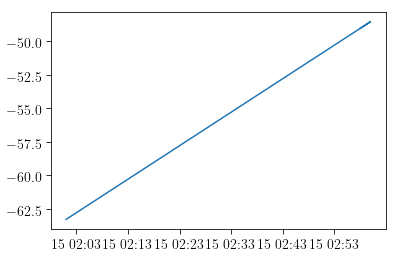

In [50]:
plt.plot(sun["date"], sun["predictphi"])

In [33]:
now = np.datetime64(datetime.datetime.now())
(now.astype('uint64') / 1e6).astype('uint32')

1616154179